# #1 당뇨

In [109]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
#load data

diab = load_diabetes()

In [111]:
diab.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [112]:
diab_df =  pd.DataFrame(diab.data, columns=diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [113]:
diab_df["target"] = diab.target
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [114]:
diab_df.info()
# 자료형과 null 값을 조회

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [115]:
features = [f for f in list(diab_df.columns[:-1])]
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

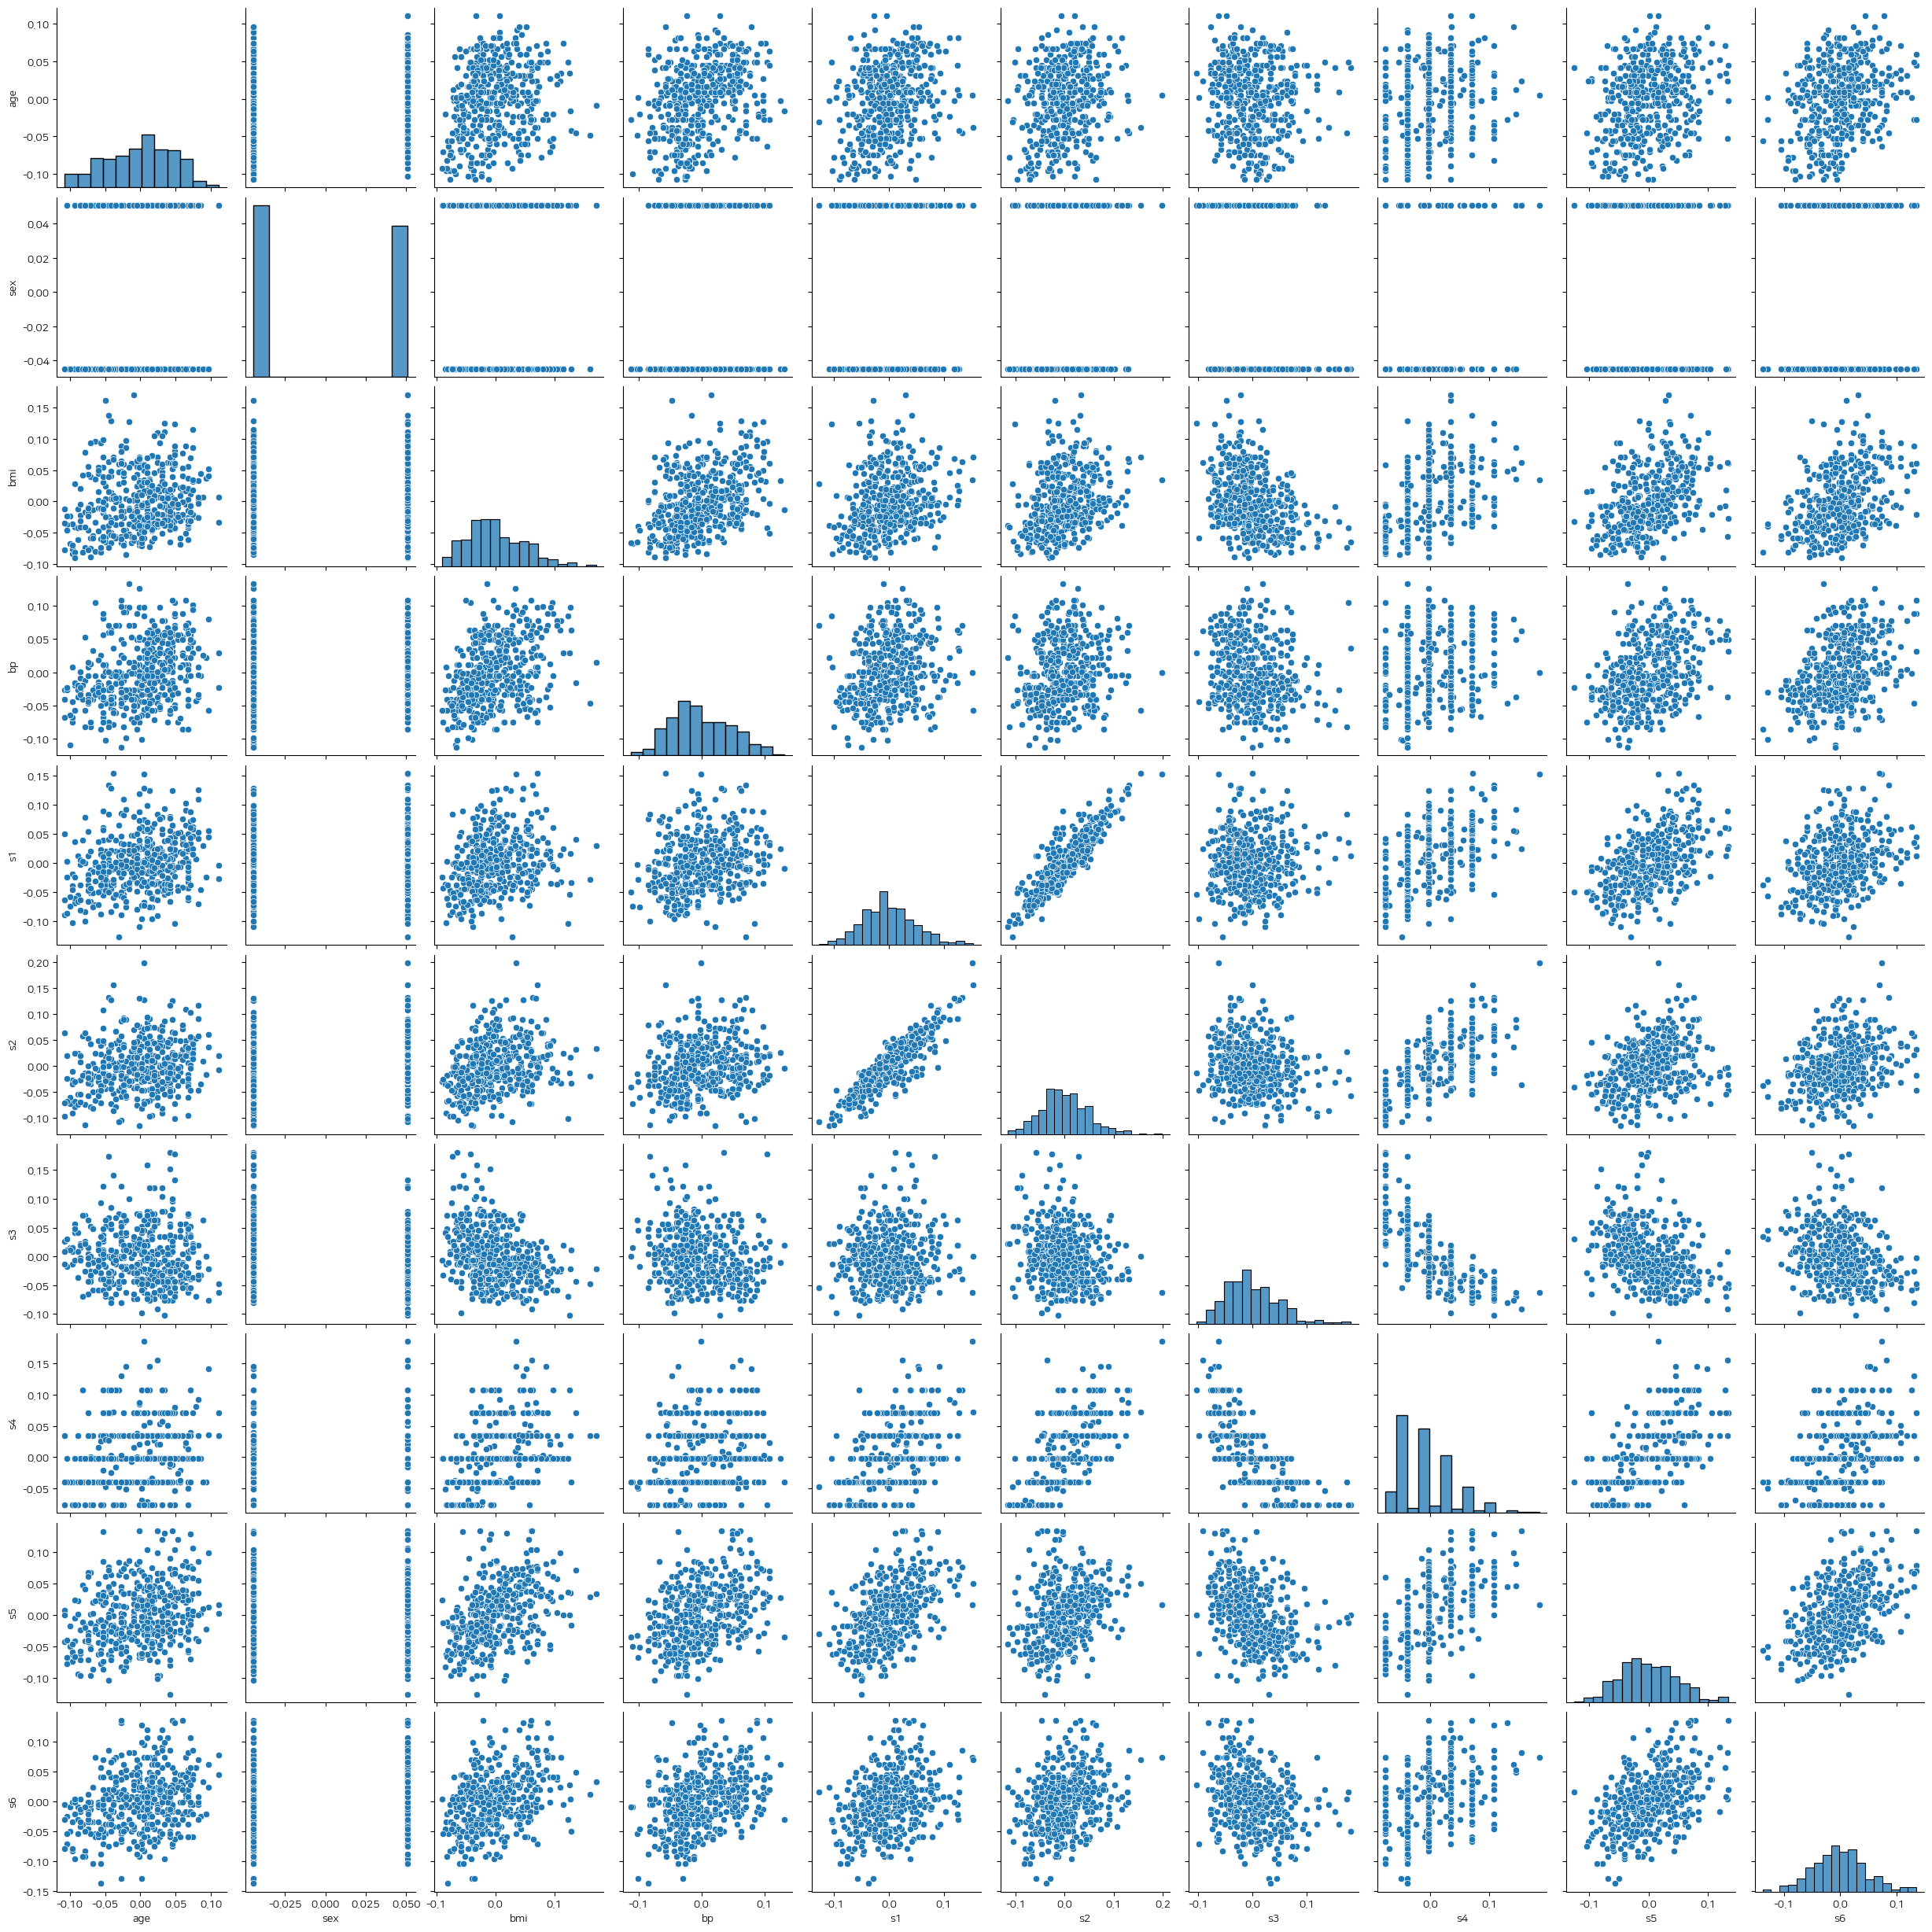

In [116]:
import matplotlib as mpl
mpl.rc('axes', unicode_minus=False)

sns.pairplot(diab_df[features])
# 이렇게 보니까 모르겠다

<AxesSubplot: >

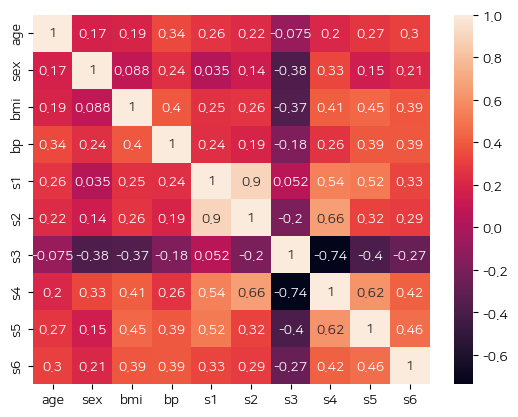

In [117]:
corr_df = diab_df[features].corr()
sns.heatmap(corr_df, annot=True)

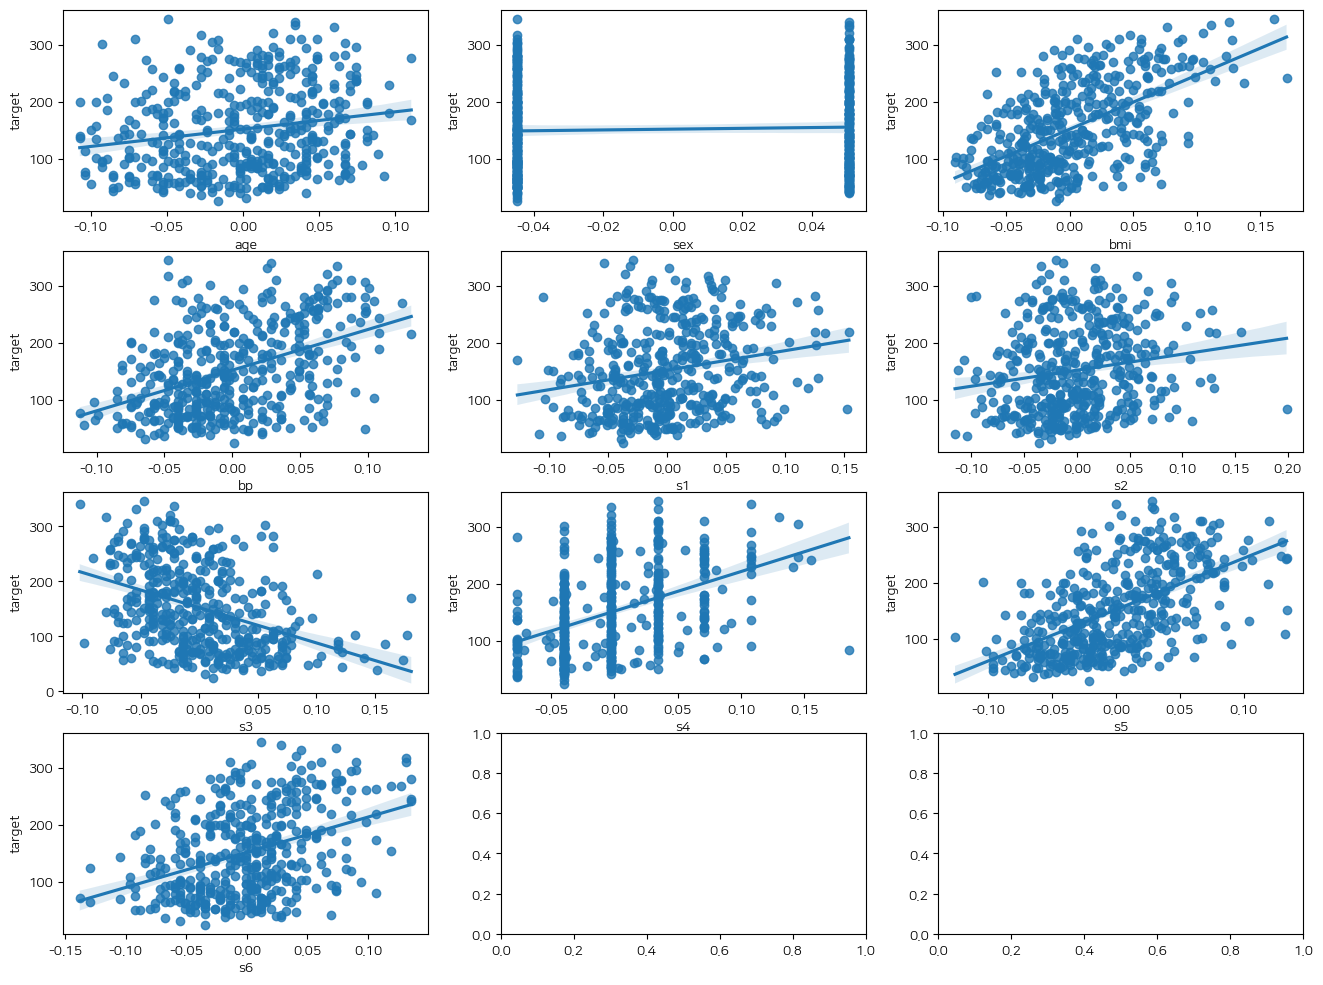

In [118]:

fig, axs = plt.subplots(figsize = (16, 12), nrows=4, ncols=3)

for i, feature in enumerate(features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y="target", data=diab_df, ax=axs[row][col])

In [126]:
#heatplot 을 보니 s1, s2와 다중공선성이 의심된다  s2는 드랍하자
features = diab_df.columns[:-1]
drop_features = features.drop([])
features


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

<AxesSubplot: >

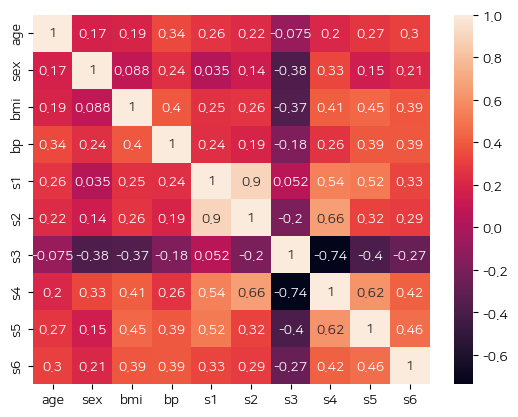

In [120]:
corr_df =diab_df[features].corr()
sns.heatmap(corr_df, annot=True)

In [142]:
from sklearn.model_selection import train_test_split

X = diab_df[features]
y = diab_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=27)
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
169,-0.001882,-0.044642,-0.026684,0.049415,0.058973,-0.016032,-0.047082,0.071210,0.133597,0.019633
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
63,-0.034575,-0.044642,-0.037463,-0.060756,0.020446,0.043466,-0.013948,-0.002592,-0.030748,-0.071494
12,0.016281,-0.044642,-0.028840,-0.009113,-0.004321,-0.009769,0.044958,-0.039493,-0.030748,-0.042499


In [143]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [144]:
from sklearn.linear_model import LinearRegression
# 객체 생성
lr = LinearRegression()

In [145]:
#학습 수행
reg = lr.fit(X_train, y_train)

In [146]:
#근데 매번 저렇게 모델 평가 만들기 힘드니까 함수를 하나 만들자 
def get_score(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return (mse, rmse, r2)


In [147]:
y_pred = reg.predict(X_test)

mse, rmse, r2 = get_score(y_test, y_pred)
print(mse, rmse, r2)

2712.4894026687293 52.08156490226392 0.39534495486934407


# #2

In [173]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [174]:
# from sklearn import datasets 
# california = datasets.fetch_openml('california') #그래서 이렇게 가져옴

In [175]:
california = pd.read_csv("data/02ml2/california_dataset.csv")

In [176]:
california.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [177]:
# target이 price 
california

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [178]:
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [179]:
features = [f for f in california.columns[:-1]]


<AxesSubplot: >

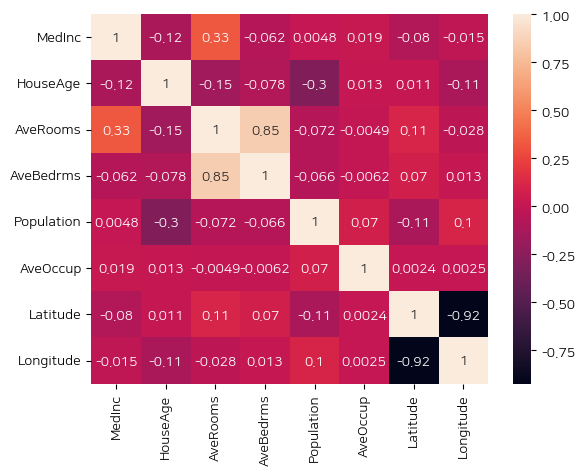

In [180]:
corr_df = california[features].corr()
sns.heatmap(corr_df, annot=True)

In [192]:
# latitude longitude  다중 공선성
# features.remove("Latitude")


<AxesSubplot: >

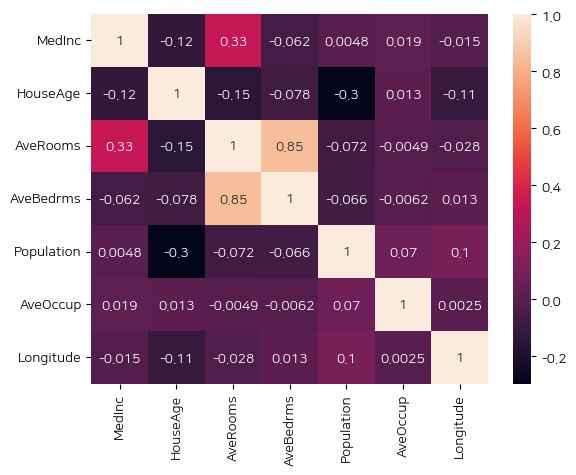

In [184]:
corr_df = california[features].corr()#모든 컬럼에 대해서 corr즉 상관관계를 가져옴
sns.heatmap(corr_df, annot=True)

In [188]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체
california
#sklearn은 x,y를 분리해야 함
X = california.drop(['Price'], axis = 1) # drop 을 쓰거나 
# or
y = california["Price"]
# 데이터가 준비되었다 !

In [194]:
from sklearn.model_selection import train_test_split
# X(독립변수), Y(종속변수) 분할

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=27)

# 학습용 데이터와 평가용 데이터로 분할하기


In [195]:
from sklearn.linear_model import LinearRegression
# 객체 생성
lr = LinearRegression()

In [196]:
#학습 수행
reg = lr.fit(X_train, y_train)

In [197]:
y_pred = reg.predict(X_test)

mse, rmse, r2 = get_score(y_test, y_pred)
print(mse, rmse, r2)

0.5423293447570136 0.736430135693138 0.5886851927020106
